In [1]:
import numpy as np 
import pandas as pd
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline

import importlib
import utils


In [2]:
importlib.reload(utils)
from utils import get_annot, plot_bboxes, write_annot

In [3]:
anndic = get_annot("./dataset/LE_cand1_cls3/LE_all.txt")

imgfiles = list(anndic.keys())

In [4]:
np.random.seed(seed=7)
idxs = np.random.permutation( len(imgfiles) )

spl = int( 0.7 * len(imgfiles) )

idx_train = idxs[:spl]
idx_test = idxs[spl:]

len(idx_train), len(idx_test)

(21, 9)

In [5]:
idx_train

array([ 2, 17,  1,  9, 11,  5, 18, 24, 27, 29, 12, 13, 16,  0, 28,  6, 26,
       20, 10, 21,  8])

In [6]:
idx_test

array([14,  7, 23, 19,  3, 22, 25,  4, 15])

In [7]:
df_cand1 = pd.read_csv("./dataset/LE_cand1/df_cand1.csv")

In [9]:
df_cand1['val1'] = 'train'
df_cand1.loc[idx_test, 'val1'] = 'test'

df_cand1['val2'] = 'train'
df_cand1.loc[ idx_train[:9], 'val2'] = 'test'

df_cand1['val3'] = 'train'
df_cand1.loc[ idx_train[9:18], 'val3'] = 'test'



In [235]:
df_cand1['angle'] = [240, 270, 263, 290, 290, 
                     290, 285, 273, 290, 270,
                     294, 285, 290, 295, 270,
                     300, 304, 225, 220, 260,
                     270, 85, 98, 115, 200,
                     215, 215, 240, 238, 234
                    ]

In [265]:
angle = df_cand1.angle.values
angle_flip = (180 - angle) % 360
angles = np.concatenate([angle, angle_flip])

In [267]:
angle_r90 = ( angles + 90 ) % 360
angle_r180 = ( angles + 180 ) % 360
angle_r270 = ( angles + 270 ) % 360

In [268]:
angles = np.concatenate([angles, angle_r90, angle_r180, angle_r270])

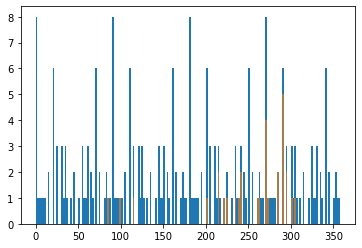

In [288]:
bins = np.arange(0, 360, 2)
plt.hist(angles, bins=bins);

plt.hist(angle, bins=bins, alpha=.6);




In [10]:
df_cand1

imgfile  brightness   val1   val2   val3
0   ./dataset/LE_cand1/tiles/001_2.jpg           1  train  train   test
1   ./dataset/LE_cand1/tiles/002_1.jpg           1  train   test  train
2   ./dataset/LE_cand1/tiles/002_2.jpg           1  train   test  train
3   ./dataset/LE_cand1/tiles/003_0.jpg           2   test  train  train
4   ./dataset/LE_cand1/tiles/003_1.jpg           2   test  train  train
5   ./dataset/LE_cand1/tiles/003_2.jpg           2  train   test  train
6   ./dataset/LE_cand1/tiles/003_4.jpg           2  train  train   test
7   ./dataset/LE_cand1/tiles/004_4.jpg           1   test  train  train
8   ./dataset/LE_cand1/tiles/005_7.jpg           2  train  train  train
9   ./dataset/LE_cand1/tiles/005_8.jpg           2  train   test  train
10  ./dataset/LE_cand1/tiles/006_4.jpg           2  train  train  train
11  ./dataset/LE_cand1/tiles/006_5.jpg           2  train   test  train
12  ./dataset/LE_cand1/tiles/006_6.jpg           2  train  train   test
13  ./dataset/LE_cand1/tiles/006_7.jpg           2  train  train   test
14  ./dataset/LE_cand1/tiles/007_0.jpg           2   test  train  train
15  ./dataset/LE_cand1/tiles/008_5.jpg           1   test  train  train
16  ./dataset/LE_cand1/tiles/009_8.jpg           2  train  train   test
17  ./dataset/LE_cand1/tiles/010_6.jpg           0  train   test  train
18  ./dataset/LE_cand1/tiles/011_6.jpg           1  train   test  train
19  ./dataset/LE_cand1/tiles/012_2.jpg           1   test  train  train
20  ./dataset/LE_cand1/tiles/013_5.jpg           1  train  train   test
21  ./dataset/LE_cand1/tiles/014_0.jpg           2  train  train  train
22  ./dataset/LE_cand1/tiles/014_1.jpg           2   test  train  train
23  ./dataset/LE_cand1/tiles/015_0.jpg           2   test  train  train
24  ./dataset/LE_cand1/tiles/016_2.jpg           1  train   test  train
25  ./dataset/LE_cand1/tiles/017_0.jpg           2   test  train  train
26  ./dataset/LE_cand1/tiles/017_3.jpg           2  train  train   test
27  ./dataset/LE_cand1/tiles/018_1.jpg           0  train   test  train
28  ./dataset/LE_cand1/tiles/018_3.jpg           0  train  train   test
29  ./dataset/LE_cand1/tiles/019_6.jpg           0  train  train   test

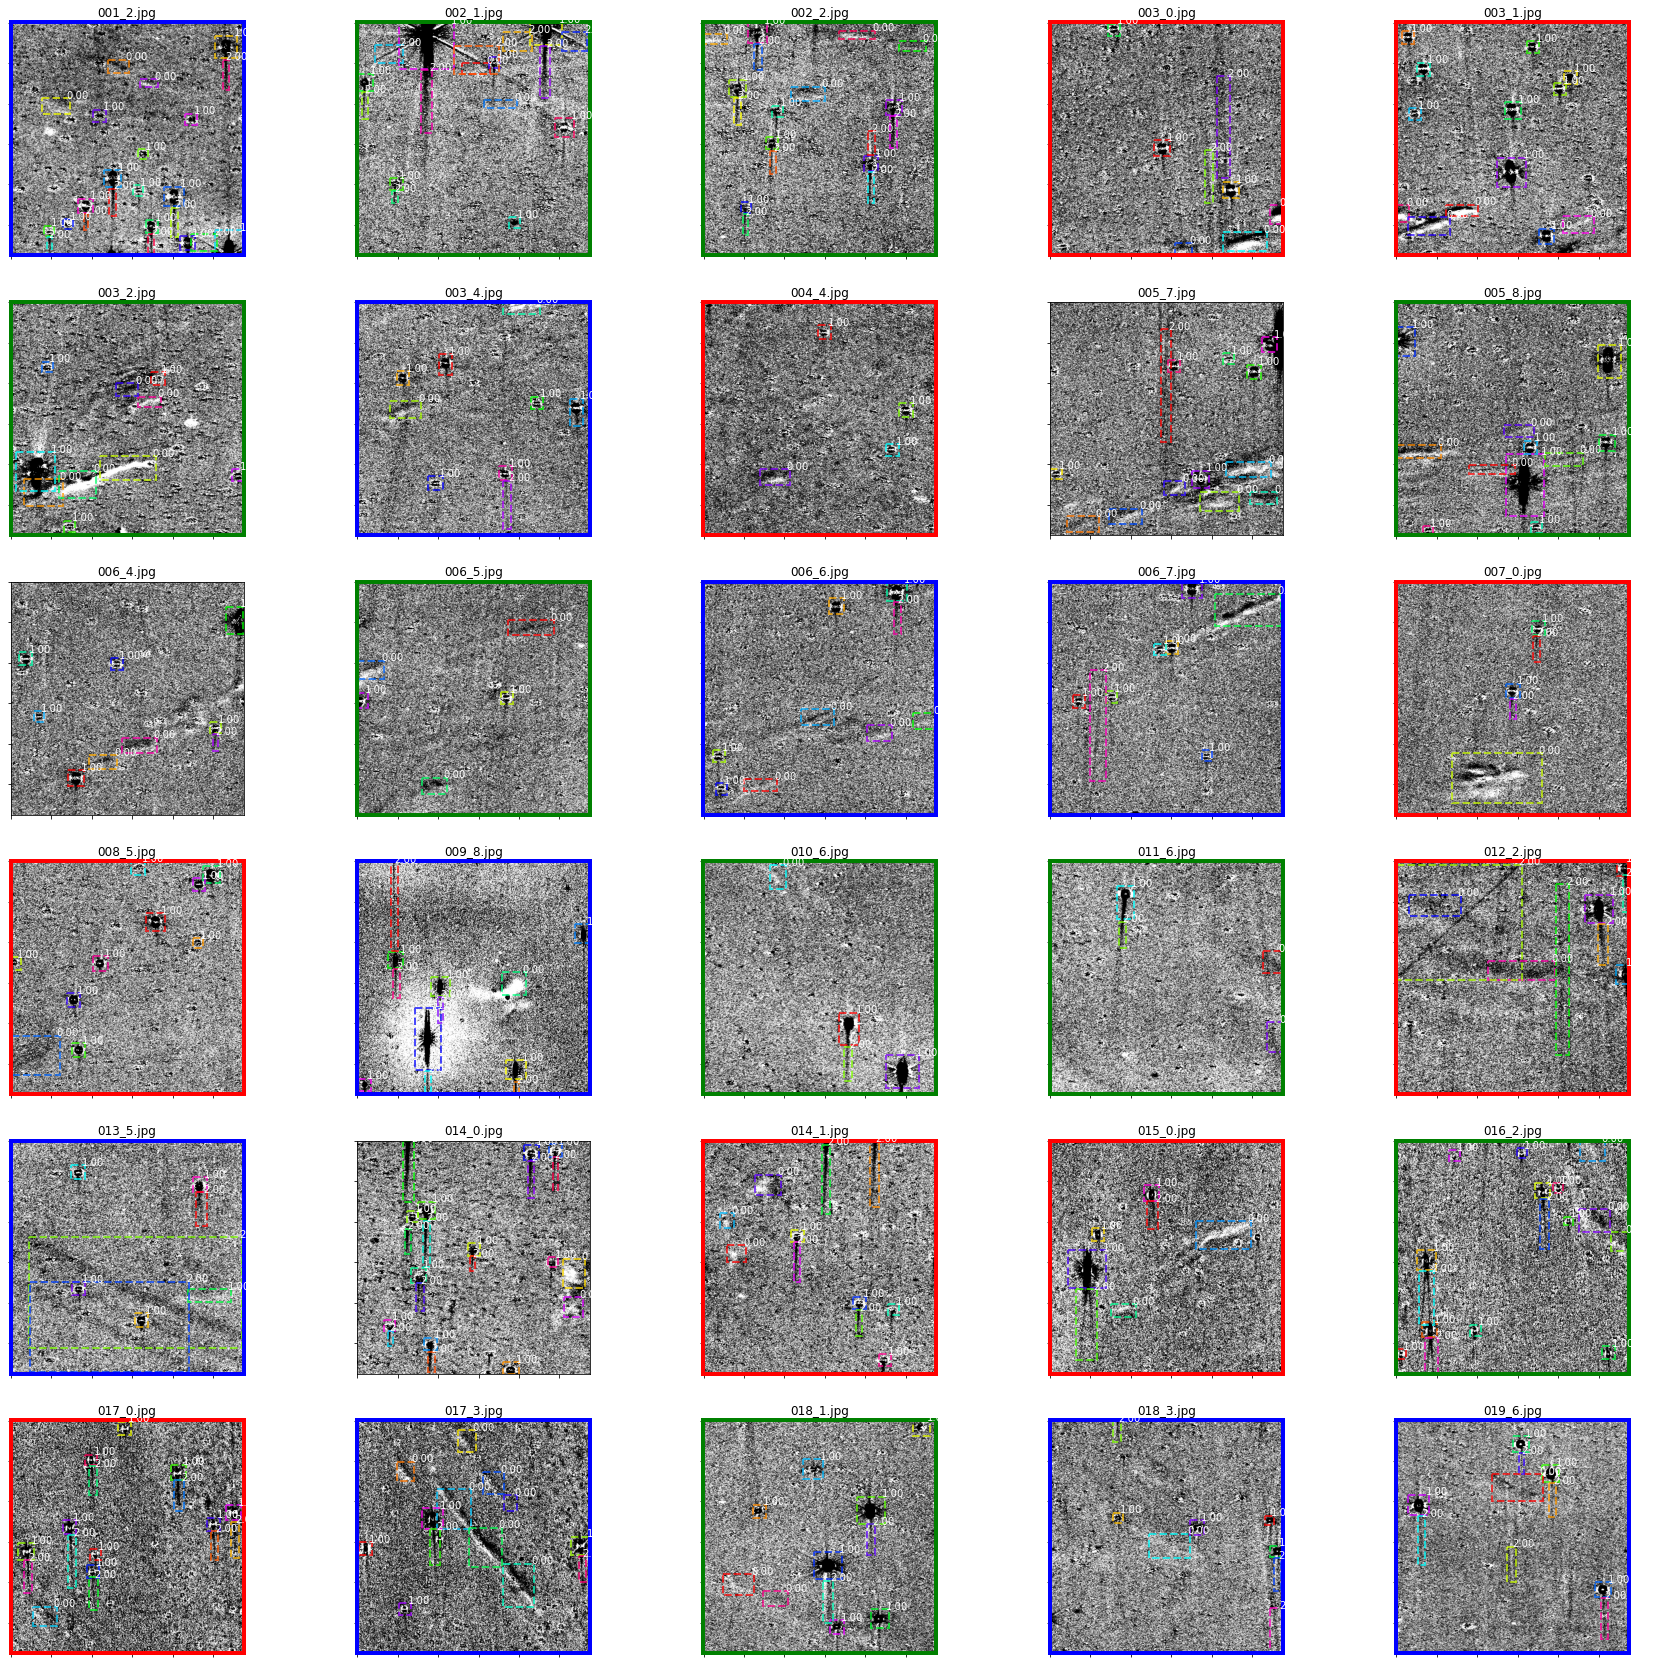

In [11]:
 # plot train and test

fig, axs = plt.subplots(ncols=5,  nrows=6, figsize=(30, 30))

axs = axs.flatten()

imgfiles.sort()
for i, imgfile in enumerate(imgfiles):
    #imgfile = imgfiles[0]

    bboxes_clsid = anndic[imgfile]
    bboxes = bboxes_clsid[:, :4]
    clsids = bboxes_clsid[:, 4]
    
    title = imgfile.split('/')[-1]
    ax = axs[i]
    plot_bboxes(image_path=imgfile, bboxes=bboxes, title=title, labels=clsids, ax=axs[i])
    #ax.set_axis_off()
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #if imgfile in imgfiles_test:
    if i in idx_test:
        [sp.set_color('r') for sp in ax.spines.values()]
        [sp.set_linewidth(4) for sp in ax.spines.values()]
    if i in idx_train[:9]:
        [sp.set_color('g') for sp in ax.spines.values()]
        [sp.set_linewidth(4) for sp in ax.spines.values()]
    if i in idx_train[9:18]:
        [sp.set_color('b') for sp in ax.spines.values()]
        [sp.set_linewidth(4) for sp in ax.spines.values()]


#fig.savefig('./dataset/LE_cand1_cls3/tiles/ann.pdf', dpi=100)
    



In [225]:
#fig.savefig("ann_largebox.pdf")

In [12]:
anndic_aug = get_annot("./dataset/LE_cand1_cls3/LE_all_aug.txt")

In [13]:
df_cand1.head(2)

imgfile  brightness   val1   val2   val3
0  ./dataset/LE_cand1/tiles/001_2.jpg           1  train  train   test
1  ./dataset/LE_cand1/tiles/002_1.jpg           1  train   test  train

In [23]:
# write train to txt file

imgfiles = df_cand1 ['imgfile'] [ df_cand1['val3']=='test' ]

txtfile = './dataset/LE_cand1_cls3/test_aug3.txt'
annot_ = {}

titles =  [ '', '_r90', '_r180', '_r270',
             '_fliph', '_fliph_r90', '_fliph_r180', '_fliph_r270',]
             #'_flipv', '_flipv_r90', '_flipv_r180', '_flipv_r270',]

for imgfile in imgfiles:
    
    for t in titles:
        imgfile_ = imgfile.replace('LE_cand1', 'LE_cand1_cls3').replace('tiles/', 'tiles_aug/').replace('.jpg', t)+'.jpg'
        
        bboxes = anndic_aug[imgfile_]
                
        annot_[imgfile_] = bboxes
    print(imgfile)
write_annot(anndic=annot_, txtfile=txtfile)  

shuffle_annot(annot_path=txtfile)

./dataset/LE_cand1/tiles/001_2.jpg
./dataset/LE_cand1/tiles/003_4.jpg
./dataset/LE_cand1/tiles/006_6.jpg
./dataset/LE_cand1/tiles/006_7.jpg
./dataset/LE_cand1/tiles/009_8.jpg
./dataset/LE_cand1/tiles/013_5.jpg
./dataset/LE_cand1/tiles/017_3.jpg
./dataset/LE_cand1/tiles/018_3.jpg
./dataset/LE_cand1/tiles/019_6.jpg


In [17]:
def shuffle_annot( annot_path):
    with open(annot_path, 'r') as f:
        txt = f.readlines()
        annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]
    # shuffle
    np.random.seed(seed=2)
    idxs = np.random.permutation( len(annotations) )

    with open(annot_path, 'w') as f:
        for idx in idxs:
            ann = annotations[idx] + '\n'
            f.write(ann)
        
